SpaceShip Titanic via Kaggle
https://www.kaggle.com/competitions/spaceship-titanic/overview

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

In [2]:
#Importing data into Pandas
trainData = pd.read_csv('train.csv')
testData = pd.read_csv('test.csv')

In [3]:
trainData.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
trainData.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
testData.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [7]:
testData.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [8]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [9]:
subData = pd.read_csv('sample_submission.csv')

In [10]:
subData.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [11]:
trainData.describe(include=['O'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


Column Info: 
PassengerId: Unique
Name: Almost Unique


Features: HomePlanet, CryoSleep(Bool), Cabin, Destination, VIP(Bool)

In [12]:
features = ['HomePlant' , 'CryoSleep' , 'Cabin' , 'Destination' , 'VIP']

In [13]:
trainData.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [14]:
backupTrain = trainData.copy()

In [15]:
backupTrain.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Removing NULL values from train data

In [16]:
trainData = trainData.dropna() 

In [17]:
trainData.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

Converting the T/F Transported to 0/1

In [18]:
trainData['Transported'].replace({False: 0, True: 1}, inplace=True)

In [19]:
trainData.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


<AxesSubplot:xlabel='Transported', ylabel='count'>

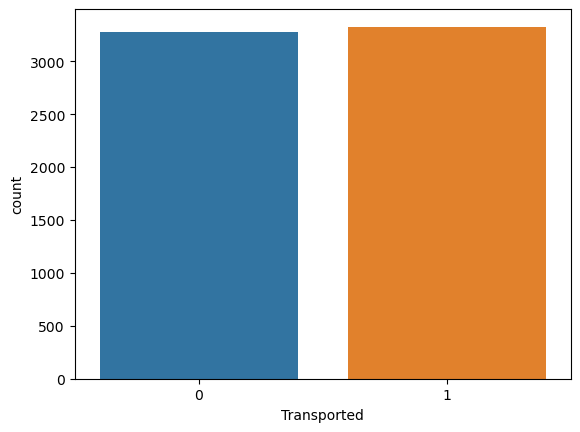

In [20]:
sns.countplot(x=trainData['Transported'])

Moving target to own df, then removing Transported from train data

In [21]:
#target.head()

In [22]:
trainData.drop(['Transported'], axis=1, inplace=True)

In [26]:
trainData.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines


Adding test data to train data df

In [27]:
traintestData = trainData.append(testData)

C:\Users\KPMal\AppData\Local\Temp\ipykernel_6364\1021560829.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  traintestData = trainData.append(testData)


In [28]:
traintestData.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines


In [29]:
traintestData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10883 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   10883 non-null  object 
 1   HomePlanet    10796 non-null  object 
 2   CryoSleep     10790 non-null  object 
 3   Cabin         10783 non-null  object 
 4   Destination   10791 non-null  object 
 5   Age           10792 non-null  float64
 6   VIP           10790 non-null  object 
 7   RoomService   10801 non-null  float64
 8   FoodCourt     10777 non-null  float64
 9   ShoppingMall  10785 non-null  float64
 10  Spa           10782 non-null  float64
 11  VRDeck        10803 non-null  float64
 12  Name          10789 non-null  object 
dtypes: float64(6), object(7)
memory usage: 1.2+ MB


In [30]:
traintestData.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

Replacing Null Values from test data and replacing with the value "no data"

In [31]:
traintestData.fillna("no data", inplace = True)

In [32]:
traintestData.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

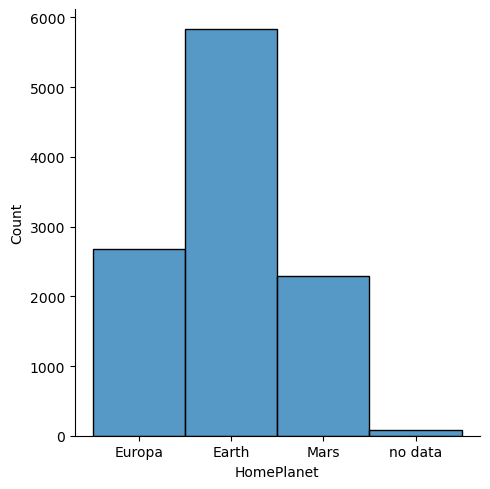

In [33]:
sns.displot(traintestData['HomePlanet'])

Convert planet strings to integers (Alphabetical)

In [34]:
traintestData['HomePlanet'].replace({"Earth": 1, "Europa": 2, "Mars": 3, "not listed": 4},inplace=True)

In [35]:
traintestData['HomePlanet'].head()

0    2
1    1
2    2
3    2
4    1
Name: HomePlanet, dtype: object

Need to change data type above to int64?

Set not listed values to False

In [36]:
traintestData['CryoSleep'][traintestData['CryoSleep'] == 'not listed' ] = False

Changing T/F to 0/1

In [37]:
traintestData['CryoSleep'].replace({False: 0, True: 1})

0       0
1       0
2       0
3       0
4       0
       ..
4272    1
4273    0
4274    1
4275    0
4276    1
Name: CryoSleep, Length: 10883, dtype: object

In [38]:
traintestData['CryoSleep'].head()

0    False
1    False
2    False
3    False
4    False
Name: CryoSleep, dtype: object

In [39]:
traintestData['CryoSleep'] = traintestData['CryoSleep'].replace({False: 0, True: 1})

In [40]:
traintestData['CryoSleep']

0       0
1       0
2       0
3       0
4       0
       ..
4272    1
4273    0
4274    1
4275    0
4276    1
Name: CryoSleep, Length: 10883, dtype: object

In [41]:
traintestData.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,2,0,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,1,0,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,2,0,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,2,0,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,1,0,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines


In [42]:
traintestData['VIP'] = traintestData['VIP'].replace({False: 0, True: 1})

In [43]:
traintestData.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,2,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,1,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,2,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,2,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,1,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines


In [44]:
traintestData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10883 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PassengerId   10883 non-null  object
 1   HomePlanet    10883 non-null  object
 2   CryoSleep     10883 non-null  object
 3   Cabin         10883 non-null  object
 4   Destination   10883 non-null  object
 5   Age           10883 non-null  object
 6   VIP           10883 non-null  object
 7   RoomService   10883 non-null  object
 8   FoodCourt     10883 non-null  object
 9   ShoppingMall  10883 non-null  object
 10  Spa           10883 non-null  object
 11  VRDeck        10883 non-null  object
 12  Name          10883 non-null  object
dtypes: object(13)
memory usage: 1.2+ MB


In [45]:
traintestData.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

In [46]:
traintestData['VIP'] = traintestData['VIP'].astype('string')

In [47]:
traintestData['VIP']

0       0
1       0
2       1
3       0
4       0
       ..
4272    0
4273    0
4274    0
4275    0
4276    0
Name: VIP, Length: 10883, dtype: string

In [48]:
traintestData.dtypes

PassengerId     object
HomePlanet      object
CryoSleep       object
Cabin           object
Destination     object
Age             object
VIP             string
RoomService     object
FoodCourt       object
ShoppingMall    object
Spa             object
VRDeck          object
Name            object
dtype: object

In [49]:
traintestData['VIP'].to_csv('vip.csv')

After exporting and viewing the csv, i see that cannot go to int or float due to no data values

In [50]:
traintestData['CryoSleep'] = traintestData['CryoSleep'].replace('no data', 0)

C:\Users\KPMal\anaconda3\envs\Py3-8\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CryoSleep', ylabel='Density'>

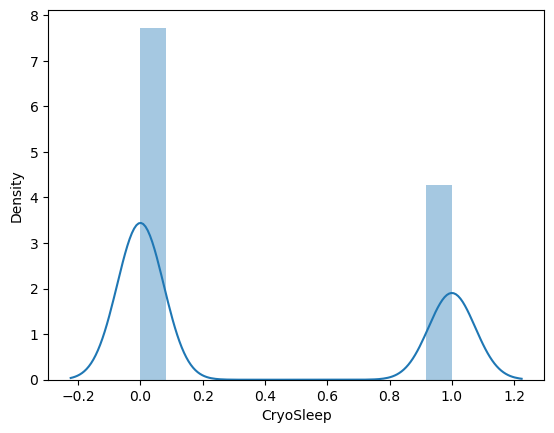

In [51]:
sns.distplot(traintestData['CryoSleep'])

In [52]:
traintestData['CryoSleep'] = traintestData['CryoSleep'].astype(int)

In [53]:
traintestData.dtypes

PassengerId     object
HomePlanet      object
CryoSleep        int32
Cabin           object
Destination     object
Age             object
VIP             string
RoomService     object
FoodCourt       object
ShoppingMall    object
Spa             object
VRDeck          object
Name            object
dtype: object

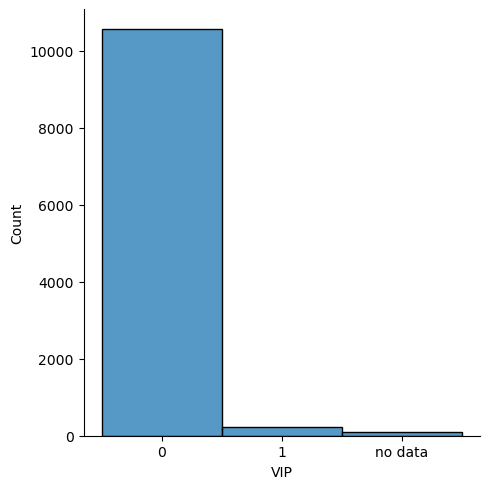

In [54]:
sns.displot(traintestData['VIP'])

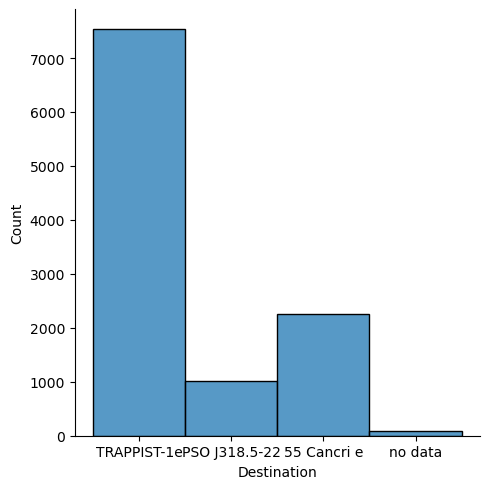

In [55]:
sns.displot(traintestData['Destination'])

In [56]:
desCount = traintestData['Destination'].value_counts()

In [57]:
desCount

TRAPPIST-1e      7532
55 Cancri e      2248
PSO J318.5-22    1011
no data            92
Name: Destination, dtype: int64

Converting Destination values to numbered values

In [58]:
traintestData['Destination'].replace({"TRAPPIST-1e": 1, "PSO J318.5-22": 2, "55 Cancri e": 3, "no data": 4},inplace=True)

In [59]:
traintestData

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,2,0,B/0/P,1,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,1,0,F/0/S,1,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,2,0,A/0/S,1,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,2,0,A/0/S,1,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,1,0,F/1/S,1,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,1,G/1496/S,1,34.0,0,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,1,0,no data,1,42.0,0,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,3,1,D/296/P,3,no data,0,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,2,0,D/297/P,4,no data,0,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [60]:
traintestData['Age']

0          39.0
1          24.0
2          58.0
3          33.0
4          16.0
         ...   
4272       34.0
4273       42.0
4274    no data
4275    no data
4276       43.0
Name: Age, Length: 10883, dtype: object

In [61]:
traintestData['Age'].info()

<class 'pandas.core.series.Series'>
Int64Index: 10883 entries, 0 to 4276
Series name: Age
Non-Null Count  Dtype 
--------------  ----- 
10883 non-null  object
dtypes: object(1)
memory usage: 170.0+ KB


In [62]:
traintestData['Age'] = traintestData['Age'].replace('no data', 0)

In [63]:
traintestData['AgeRange'] = pd.cut(x=traintestData['Age'], bins=[-1, 18, 40, 65, 100], labels=['child', 'young adult', 'mid-age', 'old']) 

In [64]:
traintestData['AgeRange']

0       young adult
1       young adult
2           mid-age
3       young adult
4             child
           ...     
4272    young adult
4273        mid-age
4274          child
4275          child
4276        mid-age
Name: AgeRange, Length: 10883, dtype: category
Categories (4, object): ['child' < 'young adult' < 'mid-age' < 'old']

In [65]:
traintestData

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,AgeRange
0,0001_01,2,0,B/0/P,1,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,young adult
1,0002_01,1,0,F/0/S,1,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,young adult
2,0003_01,2,0,A/0/S,1,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,mid-age
3,0003_02,2,0,A/0/S,1,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,young adult
4,0004_01,1,0,F/1/S,1,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,child
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,1,G/1496/S,1,34.0,0,0.0,0.0,0.0,0.0,0.0,Jeron Peter,young adult
4273,9269_01,1,0,no data,1,42.0,0,0.0,847.0,17.0,10.0,144.0,Matty Scheron,mid-age
4274,9271_01,3,1,D/296/P,3,0.0,0,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,child
4275,9273_01,2,0,D/297/P,4,0.0,0,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,child


In [66]:
traintestData['AgeRange'].replace({"young adult": 1, "child": 2, "mid-age": 3, "old":4}, inplace=True)

In [67]:
traintestData

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,AgeRange
0,0001_01,2,0,B/0/P,1,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,1
1,0002_01,1,0,F/0/S,1,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,2,0,A/0/S,1,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,3
3,0003_02,2,0,A/0/S,1,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,1
4,0004_01,1,0,F/1/S,1,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,1,G/1496/S,1,34.0,0,0.0,0.0,0.0,0.0,0.0,Jeron Peter,1
4273,9269_01,1,0,no data,1,42.0,0,0.0,847.0,17.0,10.0,144.0,Matty Scheron,3
4274,9271_01,3,1,D/296/P,3,0.0,0,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,2
4275,9273_01,2,0,D/297/P,4,0.0,0,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,2


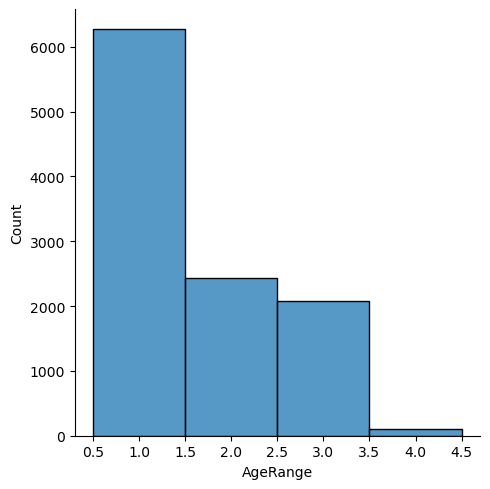

In [68]:
sns.displot(traintestData['AgeRange'])

In [69]:
traintestData.drop(columns=['Age'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,AgeRange
0,0001_01,2,0,B/0/P,1,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,1
1,0002_01,1,0,F/0/S,1,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,2,0,A/0/S,1,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,3
3,0003_02,2,0,A/0/S,1,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,1
4,0004_01,1,0,F/1/S,1,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,1,G/1496/S,1,0,0.0,0.0,0.0,0.0,0.0,Jeron Peter,1
4273,9269_01,1,0,no data,1,0,0.0,847.0,17.0,10.0,144.0,Matty Scheron,3
4274,9271_01,3,1,D/296/P,3,0,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,2
4275,9273_01,2,0,D/297/P,4,0,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,2


In [70]:
traintestData.dtypes

PassengerId       object
HomePlanet        object
CryoSleep          int32
Cabin             object
Destination        int64
Age              float64
VIP               string
RoomService       object
FoodCourt         object
ShoppingMall      object
Spa               object
VRDeck            object
Name              object
AgeRange        category
dtype: object

In [71]:
traintestData['AgeRange'] = traintestData['AgeRange'].astype(int)

In [72]:
traintestData.dtypes

PassengerId      object
HomePlanet       object
CryoSleep         int32
Cabin            object
Destination       int64
Age             float64
VIP              string
RoomService      object
FoodCourt        object
ShoppingMall     object
Spa              object
VRDeck           object
Name             object
AgeRange          int32
dtype: object

In [73]:
vipCount = traintestData['VIP'].value_counts()

In [74]:
vipCount

0          10554
1            236
no data       93
Name: VIP, dtype: Int64

In [75]:
traintestData['VIP'].replace({'no data': '0'}, inplace=True)

In [76]:
traintestData['VIP']

0       0
1       0
2       1
3       0
4       0
       ..
4272    0
4273    0
4274    0
4275    0
4276    0
Name: VIP, Length: 10883, dtype: string

In [77]:
vipStatus = traintestData['VIP'].value_counts()

In [78]:
vipStatus

0    10647
1      236
Name: VIP, dtype: Int64

In [79]:
traintestData.dtypes

PassengerId      object
HomePlanet       object
CryoSleep         int32
Cabin            object
Destination       int64
Age             float64
VIP              string
RoomService      object
FoodCourt        object
ShoppingMall     object
Spa              object
VRDeck           object
Name             object
AgeRange          int32
dtype: object

In [80]:
traintestData['VIP'] = traintestData['VIP'].astype(int)

In [81]:
traintestData.dtypes

PassengerId      object
HomePlanet       object
CryoSleep         int32
Cabin            object
Destination       int64
Age             float64
VIP               int32
RoomService      object
FoodCourt        object
ShoppingMall     object
Spa              object
VRDeck           object
Name             object
AgeRange          int32
dtype: object

RoomService

In [82]:
traintestData['RoomService'].replace({'no data': '0'}, inplace=True)

In [83]:
traintestData['RoomService'] = traintestData['RoomService'].astype(int)

In [84]:
traintestData['RoomService Tier'] =pd.cut(x=traintestData['RoomService'], bins=[-1, 2000, 8000, 12000], labels =['broke', 'medium', 'high'])

In [85]:
traintestData

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,AgeRange,RoomService Tier
0,0001_01,2,0,B/0/P,1,39.0,0,0,0.0,0.0,0.0,0.0,Maham Ofracculy,1,broke
1,0002_01,1,0,F/0/S,1,24.0,0,109,9.0,25.0,549.0,44.0,Juanna Vines,1,broke
2,0003_01,2,0,A/0/S,1,58.0,1,43,3576.0,0.0,6715.0,49.0,Altark Susent,3,broke
3,0003_02,2,0,A/0/S,1,33.0,0,0,1283.0,371.0,3329.0,193.0,Solam Susent,1,broke
4,0004_01,1,0,F/1/S,1,16.0,0,303,70.0,151.0,565.0,2.0,Willy Santantines,2,broke
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,1,G/1496/S,1,34.0,0,0,0.0,0.0,0.0,0.0,Jeron Peter,1,broke
4273,9269_01,1,0,no data,1,42.0,0,0,847.0,17.0,10.0,144.0,Matty Scheron,3,broke
4274,9271_01,3,1,D/296/P,3,0.0,0,0,0.0,0.0,0.0,0.0,Jayrin Pore,2,broke
4275,9273_01,2,0,D/297/P,4,0.0,0,0,2680.0,0.0,0.0,523.0,Kitakan Conale,2,broke


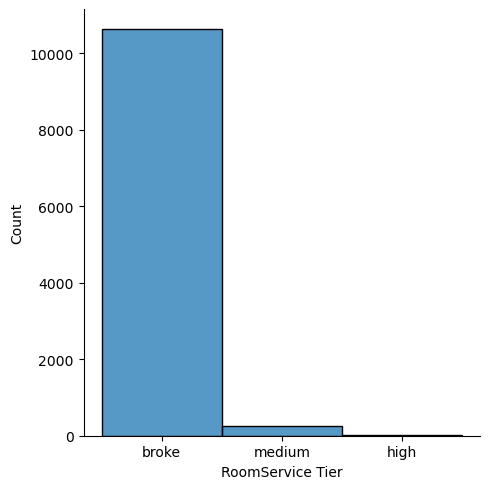

In [86]:
sns.displot(traintestData['RoomService Tier'])

In [87]:
traintestData.drop(columns=['RoomService'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,FoodCourt,ShoppingMall,Spa,VRDeck,Name,AgeRange,RoomService Tier
0,0001_01,2,0,B/0/P,1,39.0,0,0.0,0.0,0.0,0.0,Maham Ofracculy,1,broke
1,0002_01,1,0,F/0/S,1,24.0,0,9.0,25.0,549.0,44.0,Juanna Vines,1,broke
2,0003_01,2,0,A/0/S,1,58.0,1,3576.0,0.0,6715.0,49.0,Altark Susent,3,broke
3,0003_02,2,0,A/0/S,1,33.0,0,1283.0,371.0,3329.0,193.0,Solam Susent,1,broke
4,0004_01,1,0,F/1/S,1,16.0,0,70.0,151.0,565.0,2.0,Willy Santantines,2,broke
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,1,G/1496/S,1,34.0,0,0.0,0.0,0.0,0.0,Jeron Peter,1,broke
4273,9269_01,1,0,no data,1,42.0,0,847.0,17.0,10.0,144.0,Matty Scheron,3,broke
4274,9271_01,3,1,D/296/P,3,0.0,0,0.0,0.0,0.0,0.0,Jayrin Pore,2,broke
4275,9273_01,2,0,D/297/P,4,0.0,0,2680.0,0.0,0.0,523.0,Kitakan Conale,2,broke


In [88]:
rsTier = traintestData['RoomService Tier'].value_counts()

In [89]:
rsTier

broke     10624
medium      253
high          6
Name: RoomService Tier, dtype: int64

In [90]:
traintestData['RoomService Tier'].replace({"broke": 1, "medium": 2, "high": 3}, inplace=True)

In [91]:
traintestData['RoomService Tier']

0       1
1       1
2       1
3       1
4       1
       ..
4272    1
4273    1
4274    1
4275    1
4276    1
Name: RoomService Tier, Length: 10883, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [92]:
traintestData['RoomService Tier'] = traintestData['RoomService Tier'].astype(int)

In [93]:
traintestData['RoomService Tier']

0       1
1       1
2       1
3       1
4       1
       ..
4272    1
4273    1
4274    1
4275    1
4276    1
Name: RoomService Tier, Length: 10883, dtype: int32

FoodCourt

In [94]:
traintestData['FoodCourt'].replace({'no data': '0'}, inplace=True)

In [95]:
traintestData['FoodCourt'] = traintestData['FoodCourt'].astype(int)

In [96]:
traintestData['FoodCourt Tier'] =pd.cut(x=traintestData['FoodCourt'], bins=[-1, 5000, 20000, 30000], labels =['broke', 'medium', 'high'])

In [97]:
traintestData['FoodCourt Tier']

0       broke
1       broke
2       broke
3       broke
4       broke
        ...  
4272    broke
4273    broke
4274    broke
4275    broke
4276    broke
Name: FoodCourt Tier, Length: 10883, dtype: category
Categories (3, object): ['broke' < 'medium' < 'high']

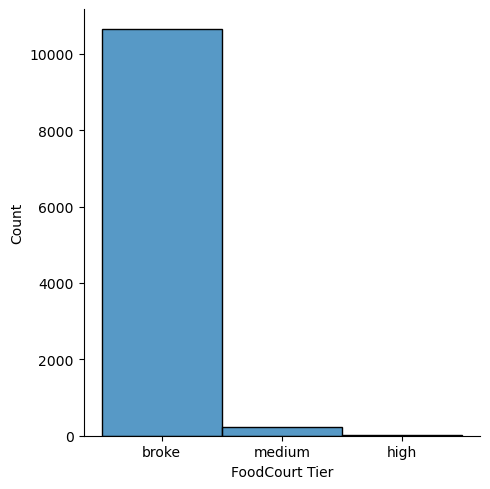

In [98]:
sns.displot(traintestData['FoodCourt Tier'])

In [99]:
traintestData

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,AgeRange,RoomService Tier,FoodCourt Tier
0,0001_01,2,0,B/0/P,1,39.0,0,0,0,0.0,0.0,0.0,Maham Ofracculy,1,1,broke
1,0002_01,1,0,F/0/S,1,24.0,0,109,9,25.0,549.0,44.0,Juanna Vines,1,1,broke
2,0003_01,2,0,A/0/S,1,58.0,1,43,3576,0.0,6715.0,49.0,Altark Susent,3,1,broke
3,0003_02,2,0,A/0/S,1,33.0,0,0,1283,371.0,3329.0,193.0,Solam Susent,1,1,broke
4,0004_01,1,0,F/1/S,1,16.0,0,303,70,151.0,565.0,2.0,Willy Santantines,2,1,broke
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,1,G/1496/S,1,34.0,0,0,0,0.0,0.0,0.0,Jeron Peter,1,1,broke
4273,9269_01,1,0,no data,1,42.0,0,0,847,17.0,10.0,144.0,Matty Scheron,3,1,broke
4274,9271_01,3,1,D/296/P,3,0.0,0,0,0,0.0,0.0,0.0,Jayrin Pore,2,1,broke
4275,9273_01,2,0,D/297/P,4,0.0,0,0,2680,0.0,0.0,523.0,Kitakan Conale,2,1,broke


In [100]:
traintestData = traintestData.drop(columns=['Age'])

In [101]:
traintestData

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,AgeRange,RoomService Tier,FoodCourt Tier
0,0001_01,2,0,B/0/P,1,0,0,0,0.0,0.0,0.0,Maham Ofracculy,1,1,broke
1,0002_01,1,0,F/0/S,1,0,109,9,25.0,549.0,44.0,Juanna Vines,1,1,broke
2,0003_01,2,0,A/0/S,1,1,43,3576,0.0,6715.0,49.0,Altark Susent,3,1,broke
3,0003_02,2,0,A/0/S,1,0,0,1283,371.0,3329.0,193.0,Solam Susent,1,1,broke
4,0004_01,1,0,F/1/S,1,0,303,70,151.0,565.0,2.0,Willy Santantines,2,1,broke
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,1,G/1496/S,1,0,0,0,0.0,0.0,0.0,Jeron Peter,1,1,broke
4273,9269_01,1,0,no data,1,0,0,847,17.0,10.0,144.0,Matty Scheron,3,1,broke
4274,9271_01,3,1,D/296/P,3,0,0,0,0.0,0.0,0.0,Jayrin Pore,2,1,broke
4275,9273_01,2,0,D/297/P,4,0,0,2680,0.0,0.0,523.0,Kitakan Conale,2,1,broke


In [102]:
traintestData['FoodCourt Tier'].replace({"broke": 1, "medium": 2, "high": 3}, inplace=True)

In [103]:
traintestData['FoodCourt Tier'] = traintestData['FoodCourt Tier'].astype(int)

In [104]:
traintestData.dtypes

PassengerId         object
HomePlanet          object
CryoSleep            int32
Cabin               object
Destination          int64
VIP                  int32
RoomService          int32
FoodCourt            int32
ShoppingMall        object
Spa                 object
VRDeck              object
Name                object
AgeRange             int32
RoomService Tier     int32
FoodCourt Tier       int32
dtype: object

In [105]:
traintestData

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,AgeRange,RoomService Tier,FoodCourt Tier
0,0001_01,2,0,B/0/P,1,0,0,0,0.0,0.0,0.0,Maham Ofracculy,1,1,1
1,0002_01,1,0,F/0/S,1,0,109,9,25.0,549.0,44.0,Juanna Vines,1,1,1
2,0003_01,2,0,A/0/S,1,1,43,3576,0.0,6715.0,49.0,Altark Susent,3,1,1
3,0003_02,2,0,A/0/S,1,0,0,1283,371.0,3329.0,193.0,Solam Susent,1,1,1
4,0004_01,1,0,F/1/S,1,0,303,70,151.0,565.0,2.0,Willy Santantines,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,1,G/1496/S,1,0,0,0,0.0,0.0,0.0,Jeron Peter,1,1,1
4273,9269_01,1,0,no data,1,0,0,847,17.0,10.0,144.0,Matty Scheron,3,1,1
4274,9271_01,3,1,D/296/P,3,0,0,0,0.0,0.0,0.0,Jayrin Pore,2,1,1
4275,9273_01,2,0,D/297/P,4,0,0,2680,0.0,0.0,523.0,Kitakan Conale,2,1,1


Spa

In [106]:
traintestData['Spa'].replace({'no data': '0'}, inplace=True)

In [107]:
traintestData['Spa'] = traintestData['Spa'].astype(int)

In [108]:
traintestData['Spa Tier'] =pd.cut(x=traintestData['Spa'], bins=[-1, 5000, 15000, 23000], labels =['broke', 'medium', 'high'])

In [109]:
traintestData['Spa Tier']

0        broke
1        broke
2       medium
3        broke
4        broke
         ...  
4272     broke
4273     broke
4274     broke
4275     broke
4276     broke
Name: Spa Tier, Length: 10883, dtype: category
Categories (3, object): ['broke' < 'medium' < 'high']

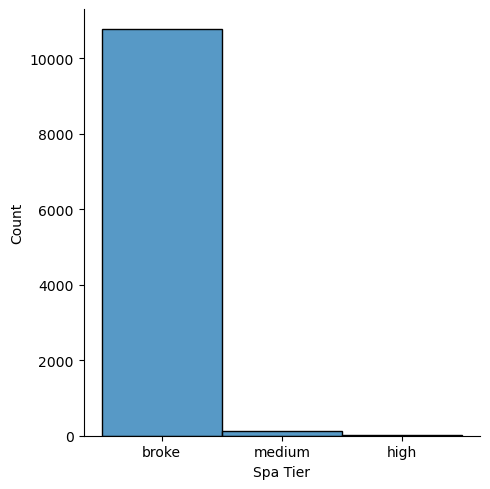

In [110]:
sns.displot(traintestData['Spa Tier'])

In [111]:
traintestData['Spa Tier'].replace({"broke": 1, "medium": 2, "high": 3}, inplace=True)

In [112]:
traintestData.dtypes

PassengerId           object
HomePlanet            object
CryoSleep              int32
Cabin                 object
Destination            int64
VIP                    int32
RoomService            int32
FoodCourt              int32
ShoppingMall          object
Spa                    int32
VRDeck                object
Name                  object
AgeRange               int32
RoomService Tier       int32
FoodCourt Tier         int32
Spa Tier            category
dtype: object

In [113]:
traintestData['Spa Tier'] = traintestData['Spa Tier'].astype(int)

VRDeck

In [114]:
traintestData.dtypes

PassengerId         object
HomePlanet          object
CryoSleep            int32
Cabin               object
Destination          int64
VIP                  int32
RoomService          int32
FoodCourt            int32
ShoppingMall        object
Spa                  int32
VRDeck              object
Name                object
AgeRange             int32
RoomService Tier     int32
FoodCourt Tier       int32
Spa Tier             int32
dtype: object

In [115]:
traintestData['VRDeck'].replace({'no data': '0'}, inplace=True)

In [116]:
traintestData['VRDeck'] = traintestData['VRDeck'].astype(int)

In [117]:
traintestData['VRDeck Tier'] =pd.cut(x=traintestData['VRDeck'], bins=[-1, 5000, 15000, 23000], labels =['broke', 'medium', 'high'])

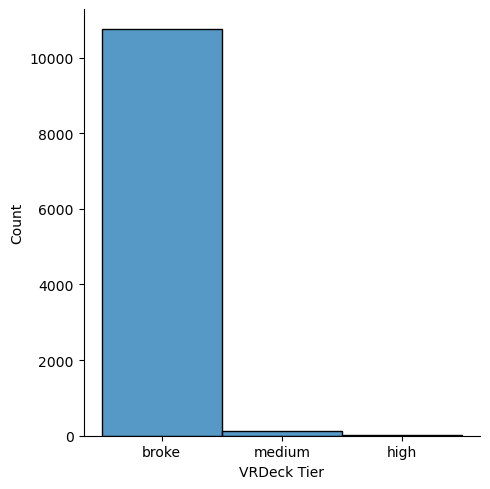

In [118]:
sns.displot(traintestData['VRDeck Tier'])

In [119]:
traintestData['VRDeck Tier'].replace({"broke": 1, "medium": 2, "high": 3}, inplace=True)

In [120]:
traintestData.dtypes

PassengerId           object
HomePlanet            object
CryoSleep              int32
Cabin                 object
Destination            int64
VIP                    int32
RoomService            int32
FoodCourt              int32
ShoppingMall          object
Spa                    int32
VRDeck                 int32
Name                  object
AgeRange               int32
RoomService Tier       int32
FoodCourt Tier         int32
Spa Tier               int32
VRDeck Tier         category
dtype: object

In [121]:
traintestData['VRDeck Tier'] = traintestData['VRDeck Tier'].astype(int)

In [122]:
traintestData.dtypes

PassengerId         object
HomePlanet          object
CryoSleep            int32
Cabin               object
Destination          int64
VIP                  int32
RoomService          int32
FoodCourt            int32
ShoppingMall        object
Spa                  int32
VRDeck               int32
Name                object
AgeRange             int32
RoomService Tier     int32
FoodCourt Tier       int32
Spa Tier             int32
VRDeck Tier          int32
dtype: object

In [123]:
traintestData

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,AgeRange,RoomService Tier,FoodCourt Tier,Spa Tier,VRDeck Tier
0,0001_01,2,0,B/0/P,1,0,0,0,0.0,0,0,Maham Ofracculy,1,1,1,1,1
1,0002_01,1,0,F/0/S,1,0,109,9,25.0,549,44,Juanna Vines,1,1,1,1,1
2,0003_01,2,0,A/0/S,1,1,43,3576,0.0,6715,49,Altark Susent,3,1,1,2,1
3,0003_02,2,0,A/0/S,1,0,0,1283,371.0,3329,193,Solam Susent,1,1,1,1,1
4,0004_01,1,0,F/1/S,1,0,303,70,151.0,565,2,Willy Santantines,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,1,G/1496/S,1,0,0,0,0.0,0,0,Jeron Peter,1,1,1,1,1
4273,9269_01,1,0,no data,1,0,0,847,17.0,10,144,Matty Scheron,3,1,1,1,1
4274,9271_01,3,1,D/296/P,3,0,0,0,0.0,0,0,Jayrin Pore,2,1,1,1,1
4275,9273_01,2,0,D/297/P,4,0,0,2680,0.0,0,523,Kitakan Conale,2,1,1,1,1


In [124]:
traintestData['ShoppingMall'].replace({'no data': '0'}, inplace=True)

In [125]:
traintestData['ShoppingMall'] = traintestData['ShoppingMall'].astype(float)

In [126]:
homeplanetCounts = traintestData['HomePlanet'].value_counts()

In [127]:
homeplanetCounts

1          5829
2          2675
3          2292
no data      87
Name: HomePlanet, dtype: int64

In [128]:
traintestData['HomePlanet'].replace({'no data': '4'}, inplace=True)

In [129]:
homeplanetCounts = traintestData['HomePlanet'].value_counts()

In [130]:
homeplanetCounts

1    5829
2    2675
3    2292
4      87
Name: HomePlanet, dtype: int64

In [131]:
traintestData['HomePlanet'] = traintestData['HomePlanet'].astype(int)

In [132]:
traintestData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10883 entries, 0 to 4276
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       10883 non-null  object 
 1   HomePlanet        10883 non-null  int32  
 2   CryoSleep         10883 non-null  int32  
 3   Cabin             10883 non-null  object 
 4   Destination       10883 non-null  int64  
 5   VIP               10883 non-null  int32  
 6   RoomService       10883 non-null  int32  
 7   FoodCourt         10883 non-null  int32  
 8   ShoppingMall      10883 non-null  float64
 9   Spa               10883 non-null  int32  
 10  VRDeck            10883 non-null  int32  
 11  Name              10883 non-null  object 
 12  AgeRange          10883 non-null  int32  
 13  RoomService Tier  10883 non-null  int32  
 14  FoodCourt Tier    10883 non-null  int32  
 15  Spa Tier          10883 non-null  int32  
 16  VRDeck Tier       10883 non-null  int32  

In [133]:
traintestData['Shopping Tier'] =pd.cut(x=traintestData['ShoppingMall'], bins=[-1, 2000, 8000, 13000], labels =['broke', 'medium', 'high'])

In [134]:
traintestData['Shopping Tier'].replace({"broke": 1, "medium": 2, "high": 3}, inplace=True)

In [135]:
features = {"HomePlanet", "CryoSleep", "Destination", "AgeRange", "RoomService Tier", 'FoodCourt Tier', 'Shopping Tier', 'Spa Tier', 'VRDeck Tier'}

In [136]:
trainData = pd.read_csv('train.csv')

In [137]:
trainData.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [138]:
train1 = trainData.dropna()

In [139]:
train1.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [148]:
target = train1['Transported']

In [149]:
y = target
X = traintestData[features][: len(train1)]
X_test = traintestData[features][len(train1) :]

C:\Users\KPMal\AppData\Local\Temp\ipykernel_6364\4075935655.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X = traintestData[features][: len(train1)]
C:\Users\KPMal\AppData\Local\Temp\ipykernel_6364\4075935655.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_test = traintestData[features][len(train1) :]


C:\Users\KPMal\AppData\Local\Temp\ipykernel_6364\2890135146.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  cmap = traintestData[features].corr()


<AxesSubplot:>

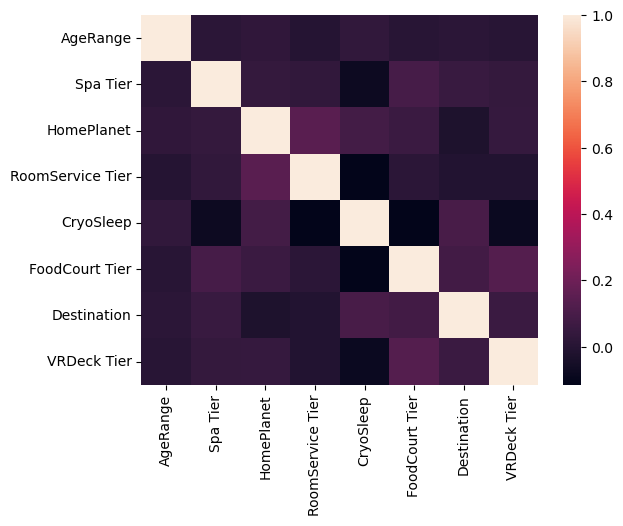

In [150]:
cmap = traintestData[features].corr()
sns.heatmap(cmap)

In [151]:
import sklearn

In [152]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=1, stratify=y, shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape

((5945, 9), (661, 9), (5945,), (661,), (4277, 9))

In [153]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42, C=10).fit(X_train, y_train)
print(model.score(X_train, y_train))

0.7370899915895711


In [154]:
y_pred = model.predict(X_val)
print(model.score(X_val, y_val))

0.7413010590015129


In [155]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_val, y_pred))

[[289  39]
 [132 201]]


In [156]:
predictions = model.predict(X_test)
predictions = predictions.astype(str)
predictions = np.char.replace(predictions, '0', 'False')
predictions = np.char.replace(predictions, '1', 'True')
predictions

array(['True', 'False', 'True', ..., 'True', 'True', 'True'], dtype='<U5')

In [158]:
subData['Transported'] = predictions
subData.to_csv('submission.csv', index=False)
my_submission = pd.read_csv("submission.csv")
my_submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True
